In [6]:
import tarfile
import os

def extract_tar_gz(file_path, extract_path='.'):
    if not tarfile.is_tarfile(file_path):
        raise ValueError(f"{file_path} is not a valid tar archive")

    print(f"Extracting '{file_path}' to '{extract_path}'...")
    try:
        with tarfile.open(file_path, 'r:gz') as tar:
            tar.extractall(path=extract_path)
        print("✅ Extraction successful.")
    except Exception as e:
        print("❌ Extraction failed:", e)

# Example usage
if __name__ == "__main__":
    tar_gz_file = '/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/data/mini_newsgroups.tar.gz'  # Update this path
    destination_dir = './data'

    os.makedirs(destination_dir, exist_ok=True)
    extract_tar_gz(tar_gz_file, destination_dir)


Extracting '/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/data/mini_newsgroups.tar.gz' to './data'...
✅ Extraction successful.


In [13]:
import nltk, os
print(nltk.data.path)

import os, nltk

for path in nltk.data.path:
    p = os.path.join(path, "tokenizers", "punkt", "english.pickle")
    print(p, "→", os.path.exists(p))


['/Users/kshitijsinghrawat/nltk_data', '/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/nltk_data', '/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/share/nltk_data', '/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']
/Users/kshitijsinghrawat/nltk_data/tokenizers/punkt/english.pickle → True
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/nltk_data/tokenizers/punkt/english.pickle → False
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/share/nltk_data/tokenizers/punkt/english.pickle → False
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/nltk_data/tokenizers/punkt/english.pickle → False
/usr/share/nltk_data/tokenizers/punkt/english.pickle → False
/usr/local/share/nltk_data/tokenizers/punkt/english.pickle → False
/usr/lib/nltk_data/tokenizers/punkt/english.pickle → False
/usr/local/lib/

In [14]:
import nltk
download_dir = "/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/nltk_data"
nltk.download("punkt", download_dir=download_dir)

# and make sure that path is in your search list:
nltk.data.path.insert(0, download_dir)



[nltk_data] Downloading package punkt to /Users/kshitijsinghrawat/Pych
[nltk_data]     armProjects/JupyterProject/.venv/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [16]:
import nltk, os
print(nltk.data.path)

import os, nltk

for path in nltk.data.path:
    p = os.path.join(path, "tokenizers", "punkt", "english.pickle")
    print(p, "→", os.path.exists(p))

['/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/nltk_data', '/Users/kshitijsinghrawat/nltk_data', '/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/nltk_data', '/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/share/nltk_data', '/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/nltk_data/tokenizers/punkt/english.pickle → True
/Users/kshitijsinghrawat/nltk_data/tokenizers/punkt/english.pickle → True
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/nltk_data/tokenizers/punkt/english.pickle → True
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/share/nltk_data/tokenizers/punkt/english.pickle → False
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/nltk_data/tokenizers/punkt/english.pickle → False
/usr/share/nltk_d

In [18]:
import nltk

# 1. Make sure your venv nltk_data is first in the search path
venv_nltk = "/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/nltk_data"
if venv_nltk not in nltk.data.path:
    nltk.data.path.insert(0, venv_nltk)

# 2. Quick sanity‐check that it can now find the model:
print(nltk.data.find("tokenizers/punkt/english.pickle"))


/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/nltk_data/tokenizers/punkt/english.pickle


In [23]:
import os
import re
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [30]:
docs = ('/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/data/20_newsgroups')
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# init once at the top
tokenizer   = RegexpTokenizer(r"[A-Za-z']+")
stop_words  = set(stopwords.words('english'))
lemmatizer  = WordNetLemmatizer()

def clean_text(text):
    # strip headers and quoted lines
    text = re.sub(r"(From:|Subject:|Organization:|Lines:|Reply-To:).*", "", text)
    text = re.sub(r">.+", "", text)
    text = re.sub(r"\n+", " ", text)

    # tokenize, lowercase, filter stopwords, then lemmatize
    tokens = tokenizer.tokenize(text.lower())
    tokens = [
        lemmatizer.lemmatize(tok)
        for tok in tokens
        if tok not in stop_words
    ]

    return " ".join(tokens)



In [29]:
cleaned_docs = [clean_text(d) for d in docs]
print(cleaned_docs)

['', 'u', '', 'e', 'r', '', '', 'k', '', 'h', '', '', '', 'j', '', '', 'n', 'g', 'h', 'r', '', 'w', '', '', '', 'p', '', 'c', 'h', '', 'r', '', 'p', 'r', '', 'j', 'e', 'c', '', '', '', 'j', 'u', 'p', '', '', 'e', 'r', 'p', 'r', '', 'j', 'e', 'c', '', '', '', '', '', '', '', '', '', '', 'n', 'e', 'w', '', 'g', 'r', '', 'u', 'p', '']


In [31]:
def load_docs(base_path):
    docs = []
    for root, _, files in os.walk(base_path):
        for fname in files:
            path = os.path.join(root, fname)
            with open(path, 'r', encoding='latin-1', errors='ignore') as f:
                text = f.read()            # 📌 make sure to *call* read()
            docs.append(text)              # append the actual string
    print(f"Loaded {len(docs)} docs.")
    return docs

raw_docs = load_docs('./data/20_newsgroups')


Loaded 19997 docs.


DOC 0 sure bashers pen fan pretty confused lack kind post recent pen massacre devil actually bit puzzled b …
DOC 1 brother market high performance video card support vesa local bus mb ram anyone suggestion idea diam …
DOC 2 finally said dream mediterranean new area greater year like holocaust number is't july usa sweden ap …



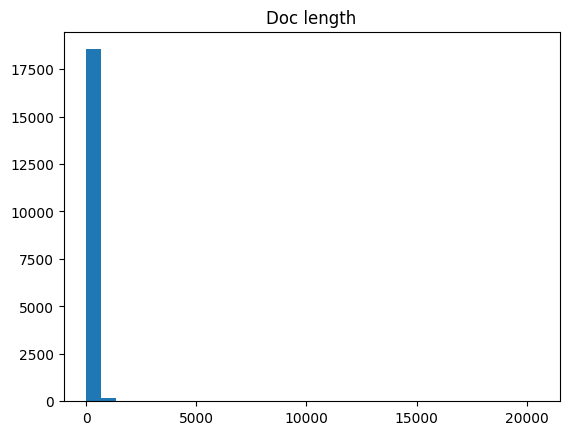

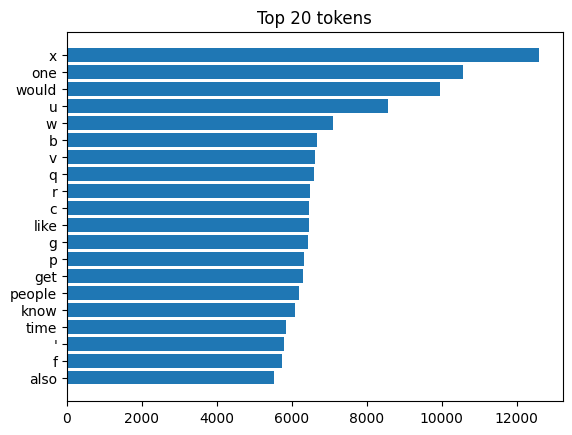

Topic 0: win year period season goal hockey player play team game
Topic 1: jewish israeli war arab muslim turkish people jew israel armenian
Topic 2: edu launch message information data key system mail nasa space
Topic 3: two time like day pin one year order new kuwait
Topic 4: power work time car use like would get problem one
Topic 5: bxn tq mb ei um pl di tm ax max
Topic 6: chip people use one right government law gun key would
Topic 7: shipping wolverine man appears comic copy cover art st new
Topic 8: la vote water conference ca pt edu professor april university
Topic 9: study patient disease medical program research health state new year
Topic 10: much good know year could time get like one would
Topic 11: hit time know get good like think one would year
Topic 12: want one mr like get going know would think people
Topic 13: chi lib tor list bos det pit font com file
Topic 14: time know output people went say file entry one said
Topic 15: like get year would price one new good gam

/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight


k= 5  silhouette=0.007


/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight


k=10  silhouette=-0.001


/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight


k=15  silhouette=-0.005


/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight


k=20  silhouette=-0.008


/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight


Final silhouette @ k=20: -0.008245446722401205


/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/ks

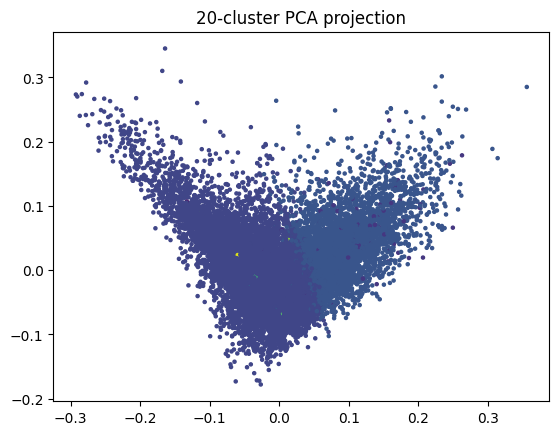

In [32]:
# 1) imports
import re
from collections import Counter
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem    import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition       import LatentDirichletAllocation, PCA
from sklearn.cluster             import KMeans
from sklearn.metrics             import silhouette_score
from sklearn.datasets            import fetch_20newsgroups

# 2) load raw text
data     = fetch_20newsgroups(subset='all',
                              remove=('headers','footers','quotes'),
                              shuffle=True, random_state=42)
raw_docs = data.data

# 3) prep NLP tools
tokenizer  = RegexpTokenizer(r"[A-Za-z']+")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r">.+",    "", text)      # drop quoted lines
    text = re.sub(r"\n+",   " ", text)      # merge newlines
    tokens = tokenizer.tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(t)
              for t in tokens
              if t not in stop_words]
    return " ".join(tokens)

# 4) clean ’em up
cleaned_docs = [clean_text(d) for d in raw_docs]

# sanity check
for i in range(3):
    print("DOC", i, cleaned_docs[i][:100], "…")
print()

# 5) EDA: doc‐lengths and top tokens
lengths   = [len(d.split()) for d in cleaned_docs]
plt.hist(lengths, bins=30); plt.title("Doc length"); plt.show()

all_tokens = " ".join(cleaned_docs).split()
top20      = Counter(all_tokens).most_common(20)
tokens,freqs= zip(*top20)
plt.barh(tokens[::-1], freqs[::-1]); plt.title("Top 20 tokens"); plt.show()

# 6) LDA
cv  = CountVectorizer(max_df=0.95, min_df=2)
dtm = cv.fit_transform(cleaned_docs)
lda = LatentDirichletAllocation(n_components=20, random_state=42)
lda.fit(dtm)

terms = cv.get_feature_names_out()
for tidx, comp in enumerate(lda.components_):
    top_terms = [terms[i] for i in comp.argsort()[-10:]]
    print(f"Topic {tidx}: {' '.join(top_terms)}")
print()

# 7) K-Means
tfidf = TfidfVectorizer(max_df=0.9, min_df=5)
X     = tfidf.fit_transform(cleaned_docs)

# silhouette to pick k
for k in [5,10,15,20]:
    score = silhouette_score(X, KMeans(n_clusters=k,random_state=42).fit(X).labels_)
    print(f"k={k:2}  silhouette={score:.3f}")

# final with k=20
km = KMeans(n_clusters=20, random_state=42).fit(X)
print("Final silhouette @ k=20:", silhouette_score(X, km.labels_))

# 8) Optional: 2D PCA plot
coords = PCA(n_components=2).fit_transform(X.toarray())
plt.scatter(coords[:,0], coords[:,1], c=km.labels_, s=5, cmap='viridis')
plt.title("20-cluster PCA projection"); plt.show()


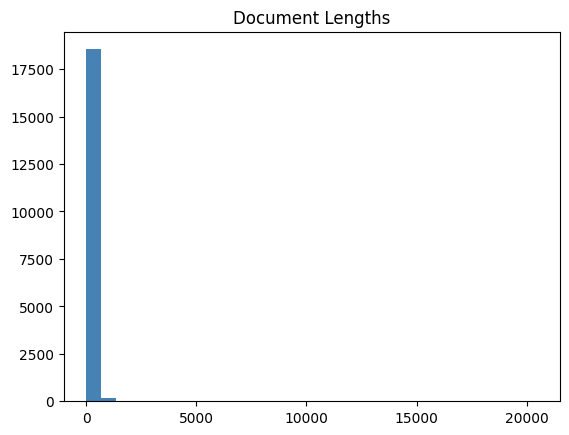

Topic 0: win year period season goal hockey player play team game
Topic 1: jewish israeli war arab muslim turkish people jew israel armenian
Topic 2: edu launch message information data key system mail nasa space
Topic 3: two time like day pin one year order new kuwait
Topic 4: power work time car use like would get problem one
Topic 5: bxn tq mb ei um pl di tm ax max
Topic 6: chip people use one right government law gun key would
Topic 7: shipping wolverine man appears comic copy cover art st new
Topic 8: la vote water conference ca pt edu professor april university
Topic 9: study patient disease medical program research health state new year
Topic 10: much good know year could time get like one would
Topic 11: hit time know get good like think one would year
Topic 12: want one mr like get going know would think people
Topic 13: chi lib tor list bos det pit font com file
Topic 14: time know output people went say file entry one said
Topic 15: like get year would price one new good gam

/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users

  k= 5 → 0.074


/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users

  k=10 → 0.045


/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users

  k=15 → 0.037


/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users

  k=20 → 0.044


/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users

  k=25 → 0.042


/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users


Final silhouette @ k=20: 0.043552010393669155


/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_

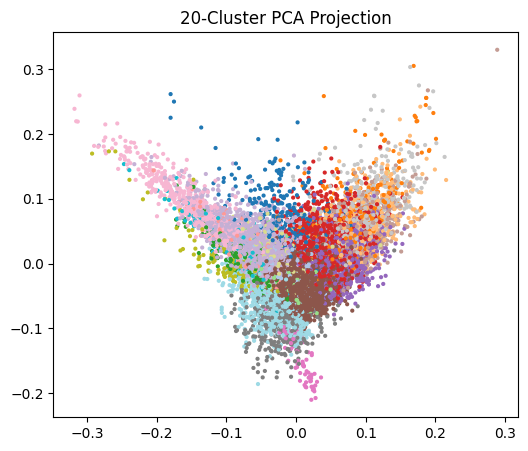

In [33]:
# 1) Imports
import os
import re
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets            import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition       import LatentDirichletAllocation, TruncatedSVD
from sklearn.cluster             import KMeans
from sklearn.preprocessing       import normalize
from sklearn.metrics             import silhouette_score
from nltk.corpus                 import stopwords
from nltk.stem                   import WordNetLemmatizer
from nltk.tokenize              import RegexpTokenizer

# 2) Load & clean
data      = fetch_20newsgroups(subset='all',
                               remove=('headers','footers','quotes'),
                               shuffle=True, random_state=42)
raw_docs  = data.data

tokenizer = RegexpTokenizer(r"[A-Za-z']+")
stop_words= set(stopwords.words('english'))
lemmatizer= WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r">.+", " ", text)     # drop quotes
    text = re.sub(r"\n+", " ", text)     # collapse newlines
    toks = tokenizer.tokenize(text.lower())
    toks = [lemmatizer.lemmatize(t) for t in toks if t not in stop_words]
    return " ".join(toks)

cleaned_docs = [clean_text(d) for d in raw_docs]

# 3) EDA (optional)
lengths = [len(d.split()) for d in cleaned_docs]
plt.hist(lengths, bins=30, color='steelblue')
plt.title("Document Lengths"); plt.show()

# 4) LDA topic modeling
cv  = CountVectorizer(max_df=0.95, min_df=2)
dtm = cv.fit_transform(cleaned_docs)
lda = LatentDirichletAllocation(n_components=20, random_state=42)
lda.fit(dtm)

terms = cv.get_feature_names_out()
for i, comp in enumerate(lda.components_):
    top10 = [terms[idx] for idx in comp.argsort()[-10:]]
    print(f"Topic {i}: {' '.join(top10)}")

# 5) TF-IDF + n-grams + normalization
tfidf = TfidfVectorizer(ngram_range=(1,2),
                        max_df=0.9, min_df=5)
X_tfidf = tfidf.fit_transform(cleaned_docs)
X_norm  = normalize(X_tfidf)

# 6) Optionally reduce dims with LSA (TruncatedSVD)
svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(X_norm)

# 7) K-Means: pick k by silhouette
print("Silhouette scores for different k:")
for k in [5,10,15,20,25]:
    km = KMeans(n_clusters=k, init='k-means++',
                n_init=10, max_iter=300,
                random_state=42).fit(X_reduced)
    score = silhouette_score(X_reduced, km.labels_, metric='euclidean')
    print(f"  k={k:2d} → {score:.3f}")

# 8) Final clustering at k=20
km20 = KMeans(n_clusters=20, init='k-means++',
              n_init=10, max_iter=300,
              random_state=42).fit(X_reduced)
print("\nFinal silhouette @ k=20:",
      silhouette_score(X_reduced, km20.labels_))

# 9) (Optional) 2D visualization via PCA
from sklearn.decomposition import PCA
coords = PCA(n_components=2).fit_transform(X_reduced)
plt.figure(figsize=(6,5))
plt.scatter(coords[:,0], coords[:,1],
            c=km20.labels_, cmap='tab20', s=4)
plt.title("20-Cluster PCA Projection")
plt.show()


In [35]:
# 0) Install if needed:
#    pip install nltk scikit-learn matplotlib

# 1) Imports & NLTK downloads
import re
import nltk
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.datasets            import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition       import LatentDirichletAllocation, TruncatedSVD, PCA
from sklearn.cluster             import KMeans
from sklearn.metrics             import silhouette_score, make_scorer
from sklearn.model_selection     import GridSearchCV, PredefinedSplit
from sklearn.pipeline            import Pipeline
from sklearn.preprocessing       import Normalizer

from nltk.corpus     import stopwords
from nltk.stem       import WordNetLemmatizer
from nltk.tokenize   import RegexpTokenizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# 2) Load & raw clean
data     = fetch_20newsgroups(subset='all',
                              remove=('headers','footers','quotes'),
                              shuffle=True, random_state=42)
raw_docs = data.data

tokenizer  = RegexpTokenizer(r"[A-Za-z']+")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r">.+", " ", text)      # drop quoted lines
    text = re.sub(r"\n+", " ", text)      # collapse newlines
    toks = tokenizer.tokenize(text.lower())
    toks = [lemmatizer.lemmatize(t) for t in toks if t not in stop_words]
    return " ".join(toks)

cleaned = [clean_text(d) for d in raw_docs]

# 3) Drop any documents that ended up empty
cleaned = [doc for doc in cleaned if doc.strip()]
print(f"{len(cleaned)} documents remain after cleaning (non-empty).")

# 4) Quick vocab sanity check
#    fit a toy vectorizer to see vocab size
toy = CountVectorizer().fit(cleaned)
print("Initial vocabulary size:", len(toy.vocabulary_))

# 5) Build your pipeline: TF-IDF → Norm → SVD → KMeans
pipe = Pipeline([
    ('tfidf',   TfidfVectorizer()),
    ('norm',    Normalizer()),                # unit-length for cosine
    ('svd',     TruncatedSVD(random_state=42)),
    ('cluster', KMeans(random_state=42))
])

# 6) Custom silhouette scorer
def sil_score(est, X):
    labels = est.fit_predict(X)
    return silhouette_score(X, labels, metric='euclidean')

sil_scorer = make_scorer(sil_score, greater_is_better=True)

# 7) Single-fold CV (all data in one fold)
ps = PredefinedSplit(test_fold=[0]*len(cleaned))

# 8) Expanded Grid (now including TF-IDF params)
param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__min_df':       [1, 5],
    'tfidf__max_df':       [0.8, 0.9, 0.95],
    'svd__n_components':   [50, 100, 150],
    'cluster__n_clusters': [10, 15, 20, 25],
    'cluster__init':       ['k-means++', 'random'],
    'cluster__n_init':     [10, 20]
}

# 9) Grid Search
grid = GridSearchCV(pipe,
                    param_grid=param_grid,
                    scoring=sil_scorer,
                    cv=ps,
                    n_jobs=-1,
                    verbose=2)
grid.fit(cleaned)

print("\n=== BEST RESULTS ===")
print("Silhouette:", grid.best_score_)
print("Params:    ", grid.best_params_)

# 10) Final clustering & 2D plot
best = grid.best_estimator_
# extract the reduced coordinates after tfidf→norm→svd
X_tfidf = best.named_steps['tfidf'].transform(cleaned)
X_norm  = best.named_steps['norm'].transform(X_tfidf)
coords  = best.named_steps['svd'].transform(X_norm)
labels  = best.named_steps['cluster'].labels_

plt.figure(figsize=(6,5))
plt.scatter(coords[:,0], coords[:,1], c=labels, cmap='tab20', s=4)
plt.title("Final Clusters (2D Projection)")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kshitijsinghrawat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kshitijsinghrawat/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kshitijsinghrawat/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


18284 documents remain after cleaning (non-empty).
Initial vocabulary size: 83279
Fitting 1 folds for each of 576 candidates, totalling 576 fits
[CV] END cluster__init=k-means++, cluster__n_clusters=10, cluster__n_init=10, svd__n_components=50, tfidf__max_df=0.8, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time=   0.0s
[CV] END cluster__init=k-means++, cluster__n_clusters=10, cluster__n_init=10, svd__n_components=50, tfidf__max_df=0.8, tfidf__min_df=1, tfidf__ngram_range=(1, 2); total time=   0.0s
[CV] END cluster__init=k-means++, cluster__n_clusters=10, cluster__n_init=10, svd__n_components=50, tfidf__max_df=0.8, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time=   0.0s
[CV] END cluster__init=k-means++, cluster__n_clusters=10, cluster__n_init=10, svd__n_components=50, tfidf__max_df=0.8, tfidf__min_df=5, tfidf__ngram_range=(1, 2); total time=   0.0s
[CV] END cluster__init=k-means++, cluster__n_clusters=10, cluster__n_init=10, svd__n_components=50, tfidf__max_df=0.9, tfidf__m

ValueError: 
All the 576 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
576 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 864, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
  File "/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/joblib/memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
  File "/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 2104, in fit_transform
    X = super().fit_transform(raw_documents)
  File "/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1376, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1282, in _count_vocab
    raise ValueError(
ValueError: empty vocabulary; perhaps the documents only contain stop words


In [36]:
from sklearn.model_selection import GridSearchCV

# … after you’ve built `pipe` exactly as before …

# 1) define your grid
param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__min_df':       [1, 5],
    'tfidf__max_df':       [0.8, 0.9, 0.95],
    'svd__n_components':   [50, 100, 150],
    'cluster__n_clusters': [10, 15, 20, 25],
    'cluster__init':       ['k-means++', 'random'],
    'cluster__n_init':     [10, 20]
}

# 2) custom silhouette scorer remains the same
def sil_score(est, X):
    labels = est.fit_predict(X)
    return silhouette_score(
        est.named_steps['svd'].transform(
          est.named_steps['norm'].transform(
            est.named_steps['tfidf'].transform(X)
          )
        ),
        labels,
        metric='euclidean'
    )

from sklearn.metrics import make_scorer
sil_scorer = make_scorer(sil_score, greater_is_better=True)

# 3) set error_score to a numeric floor (e.g. -1)
grid = GridSearchCV(
    estimator   = pipe,
    param_grid  = param_grid,
    scoring     = sil_scorer,
    cv          = PredefinedSplit(test_fold=[0]*len(cleaned)),
    n_jobs      = -1,
    verbose     = 2,
    error_score = -1        # ← failures get score -1 instead of blowing up
)

# 4) run it
grid.fit(cleaned)

print("\n=== GRID SEARCH RESULTS ===")
print("Best silhouette:", grid.best_score_)
print("Best params:    ", grid.best_params_)


Fitting 1 folds for each of 576 candidates, totalling 576 fits
[CV] END cluster__init=k-means++, cluster__n_clusters=10, cluster__n_init=10, svd__n_components=50, tfidf__max_df=0.8, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time=   0.0s
[CV] END cluster__init=k-means++, cluster__n_clusters=10, cluster__n_init=10, svd__n_components=50, tfidf__max_df=0.8, tfidf__min_df=1, tfidf__ngram_range=(1, 2); total time=   0.0s
[CV] END cluster__init=k-means++, cluster__n_clusters=10, cluster__n_init=10, svd__n_components=50, tfidf__max_df=0.8, tfidf__min_df=5, tfidf__ngram_range=(1, 1); total time=   0.0s
[CV] END cluster__init=k-means++, cluster__n_clusters=10, cluster__n_init=10, svd__n_components=50, tfidf__max_df=0.8, tfidf__min_df=5, tfidf__ngram_range=(1, 2); total time=   0.0s
[CV] END cluster__init=k-means++, cluster__n_clusters=10, cluster__n_init=10, svd__n_components=50, tfidf__max_df=0.9, tfidf__min_df=1, tfidf__ngram_range=(1, 1); total time=   0.0s
[CV] END cluster__init=k-me

ValueError: 
All the 576 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
576 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 864, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
  File "/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/joblib/memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
  File "/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 2104, in fit_transform
    X = super().fit_transform(raw_documents)
  File "/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1376, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1282, in _count_vocab
    raise ValueError(
ValueError: empty vocabulary; perhaps the documents only contain stop words


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kshitijsinghrawat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kshitijsinghrawat/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kshitijsinghrawat/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


→ 18284 non-empty documents after cleaning
→ initial vocab size: 83279 tokens


/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:547: RuntimeWarning: divide by zero encountered in matmul
  U = Q @ Uhat
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:547: RuntimeWarning: overflow encountered in matmul
  U = Q @ Uhat
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:547: RuntimeWarning: invalid value encountered in matmul
  U = Q @ Uhat
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9

New best 0.084 with {'cluster__init': 'k-means++', 'cluster__n_clusters': 10, 'cluster__n_init': 5, 'svd__n_components': 50, 'tfidf__max_df': 0.8, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)}


/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:547: RuntimeWarning: divide by zero encountered in matmul
  U = Q @ Uhat
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:547: RuntimeWarning: overflow encountered in matmul
  U = Q @ Uhat
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:547: RuntimeWarning: invalid value encountered in matmul
  U = Q @ Uhat
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9

New best 0.135 with {'cluster__init': 'k-means++', 'cluster__n_clusters': 10, 'cluster__n_init': 5, 'svd__n_components': 50, 'tfidf__max_df': 0.8, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2)}


/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:547: RuntimeWarning: divide by zero encountered in matmul
  U = Q @ Uhat
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:547: RuntimeWarning: overflow encountered in matmul
  U = Q @ Uhat
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:547: RuntimeWarning: invalid value encountered in matmul
  U = Q @ Uhat
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9


=== Grid search complete ===
Best silhouette score: 0.135
Best parameters:       {'cluster__init': 'k-means++', 'cluster__n_clusters': 10, 'cluster__n_init': 5, 'svd__n_components': 50, 'tfidf__max_df': 0.8, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2)}


/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:547: RuntimeWarning: divide by zero encountered in matmul
  U = Q @ Uhat
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:547: RuntimeWarning: overflow encountered in matmul
  U = Q @ Uhat
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:547: RuntimeWarning: invalid value encountered in matmul
  U = Q @ Uhat
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9

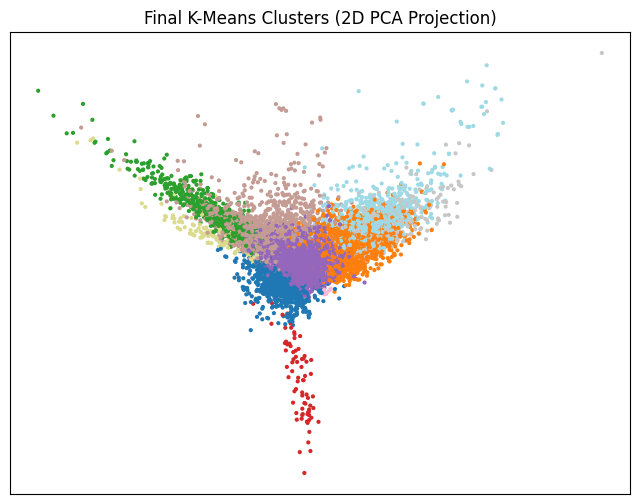

In [37]:
# =============================================================================
# 0) Install dependencies if you haven’t already:
#    pip install nltk scikit-learn matplotlib
# =============================================================================

import re
import nltk
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets            import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition       import TruncatedSVD, PCA
from sklearn.cluster             import KMeans
from sklearn.metrics             import silhouette_score
from sklearn.pipeline            import Pipeline
from sklearn.preprocessing       import Normalizer
from sklearn.model_selection     import ParameterGrid

from nltk.corpus       import stopwords
from nltk.stem         import WordNetLemmatizer
from nltk.tokenize     import RegexpTokenizer

# 1) Download NLTK data once
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# =============================================================================
# 2) Load & Clean Text
# =============================================================================
data     = fetch_20newsgroups(subset='all',
                              remove=('headers','footers','quotes'),
                              shuffle=True, random_state=42)
raw_docs = data.data

tokenizer  = RegexpTokenizer(r"[A-Za-z']+")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # strip quotes and collapse newlines
    text = re.sub(r">.+", " ", text)
    text = re.sub(r"\n+", " ", text)
    # tokenize, lowercase, drop stopwords, lemmatize
    toks = tokenizer.tokenize(text.lower())
    return " ".join(
        lemmatizer.lemmatize(t) for t in toks
        if t not in stop_words
    )

cleaned = [clean_text(doc) for doc in raw_docs]
# drop any empty docs
cleaned = [doc for doc in cleaned if doc.strip()]
print(f"→ {len(cleaned)} non-empty documents after cleaning")

# quick sanity check of vocab size
toy_vocab = CountVectorizer().fit(cleaned).vocabulary_
print(f"→ initial vocab size: {len(toy_vocab)} tokens")

# =============================================================================
# 3) Build the base pipeline (with placeholder hyperparams)
# =============================================================================
pipe = Pipeline([
    ('tfidf',   TfidfVectorizer()),
    ('norm',    Normalizer()),         # unit-length = cosine similarity
    ('svd',     TruncatedSVD(random_state=42)),
    ('cluster', KMeans(random_state=42))
])

# =============================================================================
# 4) Define your hyperparameter grid
# =============================================================================
param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__min_df':       [1, 5],
    'tfidf__max_df':       [0.8, 0.9],
    'svd__n_components':   [50, 100],
    'cluster__n_clusters': [10, 15, 20],
    'cluster__init':       ['k-means++', 'random'],
    'cluster__n_init':     [5, 10]
}

# =============================================================================
# 5) Manual grid search with try/except
# =============================================================================
best_score, best_params = -1, None

for params in ParameterGrid(param_grid):
    try:
        # set pipeline hyperparameters
        pipe.set_params(**params)
        # fit transforms all steps
        pipe.fit(cleaned)

        # extract reduced data for silhouette
        X_tfidf  = pipe.named_steps['tfidf'].transform(cleaned)
        X_norm   = pipe.named_steps['norm'].transform(X_tfidf)
        X_reduced= pipe.named_steps['svd'].transform(X_norm)
        labels   = pipe.named_steps['cluster'].labels_

        score = silhouette_score(X_reduced, labels, metric='euclidean')

        if score > best_score:
            best_score, best_params = score, params
            print(f"New best {best_score:.3f} with {best_params}")

    except ValueError:
        # skip combos that produce empty vocab or other errors
        continue

print("\n=== Grid search complete ===")
print(f"Best silhouette score: {best_score:.3f}")
print(f"Best parameters:       {best_params}")

# =============================================================================
# 6) Fit final pipeline on all data
# =============================================================================
pipe.set_params(**best_params)
pipe.fit(cleaned)

# 7) 2D Visualization via PCA
X_tfidf   = pipe.named_steps['tfidf'].transform(cleaned)
X_norm    = pipe.named_steps['norm'].transform(X_tfidf)
X_reduced = pipe.named_steps['svd'].transform(X_norm)
labels    = pipe.named_steps['cluster'].labels_

coords = PCA(n_components=2, random_state=42).fit_transform(X_reduced)

plt.figure(figsize=(8,6))
plt.scatter(coords[:,0], coords[:,1],
            c=labels, cmap='tab20', s=4)
plt.title("Final K-Means Clusters (2D PCA Projection)")
plt.xticks([]); plt.yticks([])
plt.show()


In [42]:
# assume you ran:
#   grid.fit(cleaned)
# and then:
# --- after your manual grid‐search loop that sets best_score & best_params ---

# 1) Inject the winning params into your pipeline
pipe.set_params(**best_params)

# 2) Fit it on the entire cleaned corpus
pipe.fit(cleaned)

# 3) Alias it as your best estimator
best_pipe = pipe

# pull out the TF-IDF vectorizer and the final KMeans
tfidf = best_pipe.named_steps['tfidf']
km    = best_pipe.named_steps['cluster']

# now this is safe, because tfidf has been fit
features = tfidf.get_feature_names_out()
centers  = km.cluster_centers_

# print top 10 terms per cluster


/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:547: RuntimeWarning: divide by zero encountered in matmul
  U = Q @ Uhat
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:547: RuntimeWarning: overflow encountered in matmul
  U = Q @ Uhat
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:547: RuntimeWarning: invalid value encountered in matmul
  U = Q @ Uhat
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kshitijsinghrawat/PycharmProjects/JupyterProject/.venv/lib/python3.9

In [43]:
tfidf = best_pipe.named_steps['tfidf']
km    = best_pipe.named_steps['cluster']

# Get feature names and cluster centers
features = tfidf.get_feature_names_out()
centers  = km.cluster_centers_

# Print top terms per cluster
for cid, centroid in enumerate(centers):
    top_idxs  = centroid.argsort()[-10:][::-1]
    top_terms = [features[i] for i in top_idxs]
    print(f"Cluster {cid}: {', '.join(top_terms)}")


Cluster 0: aa ab, aa, aa american, aa alkaline, aa apr, aa atlanta, aa fri, aa aaa, aa four, aa er
Cluster 1: aa, aa aa, aa apr, aa american, aa aiaa, aa good, aa jmx, aa hl, aa developing, aa fax
Cluster 2: aa, aa aiaa, aa american, aa battery, aa alkaline, aa er, aa apr, aa handle, aa gp, aa cell
Cluster 3: aa aaa, aa aiaa, aa, aa alkaline, aa apr, aa atlanta, aa er, aa jmx, aa al, aa battery
Cluster 4: aa, aa ab, aa battery, aa dpi, aa bxh, aa jw, aa fire, aa ht, aa fef, aa local
Cluster 5: aa, aa al, aa business, aa atlanta, aa cell, aa hl, aa freenet, aa alkaline, aa developing, aa er
Cluster 6: aa fax, aa ff, aa fef, aa four, aa facilitating, aa frame, aa dpi, aa good, aa jmx, aa hl
Cluster 7: aa aiaa, aa aa, aa, aa ab, aa atlanta, aa al, aa alkaline, aa albany, aa american, aa four
Cluster 8: aa albany, aa, aa al, aa american, aa battery, aa apr, aa facilitating, aa bxh, aa ab, aa atlanta
Cluster 9: aa, aa aa, aa alkaline, aa albany, aa atlanta, aa cell, aa battery, aa facilitat

In [44]:
labels = km.labels_
for cid in range(km.n_clusters):
    print(f"\n=== Cluster {cid} Samples ===")
    samples = [doc for doc, lab in zip(cleaned, labels) if lab == cid][:3]
    for s in samples:
        print(" •", s[:200].replace("\n"," "), "…")



=== Cluster 0 Samples ===
 • sure bashers pen fan pretty confused lack kind post recent pen massacre devil actually bit puzzled bit relieved however going put end non pittsburghers' relief bit praise pen man killing devil worse t …
 • stuff deleted ok here's solution problem move canada yesterday able watch four game nj pitt abc la cal cbc buff bos tsn fox mon que cbc think series go max could watching hockey playoff odd consecutiv …
 • know exact coverage state canada covered tsn maybe espn grab coverage know pick ottawa pick mean almost alexander daigle go either stay traded montreal quebec imo would take kariya alot leadership nca …

=== Cluster 1 Samples ===
 • brother market high performance video card support vesa local bus mb ram anyone suggestion idea diamond stealth pro local bus orchid farenheit ati graphic ultra pro high performance vlb card please po …
 • cad setup sale g plb local bus motherboard use mb simms k expansion slot bit slot bit slot weitek co processor socket m